### **4.3** Comparing a Convolutional NN with Drop out and augmentation:

In [2]:
def createCNN(input_shape, activation, d):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape = input_shape))
  model.add(Activation(activation))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25*d))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25*d))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation))
  model.add(Dropout(0.5*d))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [3]:
def trainNet(model, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model):

# train without data augmentation
  if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])
# train with data augmentation
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model])
  return history


In [4]:
def loadData():
  # Load the data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  # print('x_train shape:', x_train.shape)
  # print(x_train.shape[0], 'train samples')
  # print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  feature_vector_length = 32*32*3
  x_train_flat = x_train.reshape(x_train.shape[0], feature_vector_length)
  x_test_flat = x_test.reshape(x_test.shape[0], feature_vector_length)

  x_validate = x_train[40000:,:]
  x_train = x_train[:40000,:]
  y_validate = y_train[40000:,:]
  y_train = y_train[:40000,:]

  x_validate_flat = x_train_flat[40000:,:]
  x_train_flat = x_train_flat[:40000,:]
  
  return x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat 

170500096/170498071 [==============================] - 2s 0us/step
Not using data augmentation.
Epoch 1/40
1246/1250 [============================>.] - ETA: 0s - loss: 1.6509 - accuracy: 0.4073
Epoch 00001: val_accuracy improved from -inf to 0.47710, saving model to best_model_CNN.h5
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6509 - accuracy: 0.4074 - val_loss: 1.4642 - val_accuracy: 0.4771
Epoch 2/40
1243/1250 [============================>.] - ETA: 0s - loss: 1.3528 - accuracy: 0.5179
Epoch 00002: val_accuracy improved from 0.47710 to 0.54430, saving model to best_model_CNN.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3529 - accuracy: 0.5179 - val_loss: 1.2740 - val_accuracy: 0.5443
Epoch 3/40
1244/1250 [============================>.] - ETA: 0s - loss: 1.1956 - accuracy: 0.5769
Epoch 00003: val_accuracy improved from 0.54430 to 0.58860, saving model to best_model_CNN.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 

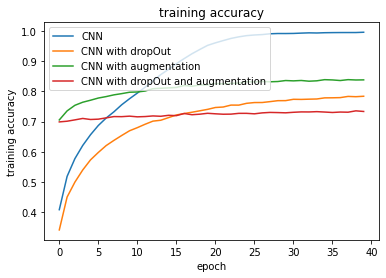

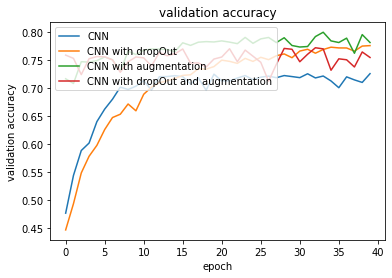

In [5]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 40
data_augmentation = False

x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat = loadData()

# Define a convolutional neural network
model_CNN = createCNN(input_shape=x_train.shape[1:], activation = 'relu',d = 0)
model_CNN_d = createCNN(input_shape=x_train.shape[1:],activation ='relu', d = 1)
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
# Compile the model before using it
model_CNN.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model_CNN_d.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


# print(model.summary())

# create a callback that will save the best model while training
save_best_model_CNN = ModelCheckpoint('best_model_CNN.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_CNN_d = ModelCheckpoint('best_model_CNN_d.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_CNN_a = ModelCheckpoint('best_model_CNN_a.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_CNN_da =ModelCheckpoint('best_model_CNN_da.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
# train model
history_CNN = trainNet(model_CNN, x_train, y_train, x_validate, y_validate, batch_size, epochs, 0, save_best_model_CNN)
history_CNN_d = trainNet(model_CNN_d, x_train, y_train, x_validate, y_validate, batch_size, epochs, 0, save_best_model_CNN_d)
history_CNN_a = trainNet(model_CNN, x_train, y_train, x_validate, y_validate, batch_size, epochs, 1, save_best_model_CNN_a)
history_CNN_da = trainNet(model_CNN_d, x_train, y_train, x_validate, y_validate, batch_size, epochs, 1, save_best_model_CNN_da)

# Plot training accuracy
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN_d.history['accuracy'])
plt.plot(history_CNN_a.history['accuracy'])
plt.plot(history_CNN_da.history['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['CNN','CNN with dropOut','CNN with augmentation','CNN with dropOut and augmentation'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history_CNN.history['val_accuracy'])
plt.plot(history_CNN_d.history['val_accuracy'])
plt.plot(history_CNN_a.history['val_accuracy'])
plt.plot(history_CNN_da.history['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['CNN','CNN with dropOut','CNN with augmentation','CNN with dropOut and augmentation'], loc='upper left')
plt.show()

# # Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
# saved_model_CNN = load_model('best_model_CNN.h5')
# scores = saved_model_CNN.evaluate(x_test, y_test, verbose=1)
# print('Test accuracy for CNN with relu activation:', scores[1])

# saved_model_CNN_d = load_model('best_model_CNN_d.h5')
# scores = saved_model_CNN_d.evaluate(x_test, y_test, verbose=1)
# print('Test accuracy for CNN with sigmoid activation:', scores[1])

# saved_model_CNN_a= load_model('best_model_CNN_a.h5')
# scores = saved_model_CNN_a.evaluate(x_test, y_test, verbose=1)
# print('Test accuracy for CNN with relu activation:', scores[1])

# saved_model_CNN_da = load_model('best_model_CNN_da.h5')
# scores = saved_model_CNN_da.evaluate(x_test, y_test, verbose=1)
# print('Test accuracy for CNN with sigmoid activation:', scores[1])



The data augmentation has several benefits:


1.   Robust optimization : The change in the entry data for NN definitely helps the learning to be more robust as the network is dealing with different data situations.
2.   More train data: The augmentation gives us more training data which helps the model to train better. It should be mentioned that this demand a more computational power from us but with this asside the accuracy would be higher.
3. More Generalized data: Augmentation would make the data more generalized for example in a cat looking to its right picture without data augmentation after learning it only can find cats looking to right but when we augment data the model would be trained to identify almost any cat picture
The zero dropout on the other hand made our training data to be more accurate however, this would result in an overfitting in the test data. That is why in more epocs witht the proper drop out rate the test accuracy would be better as it is represented in the results.

